In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data = pd.read_csv("data.csv")
data.drop(["Unnamed: 32","id"],1,inplace=True)
data.shape

(569, 31)

In [145]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [147]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [148]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


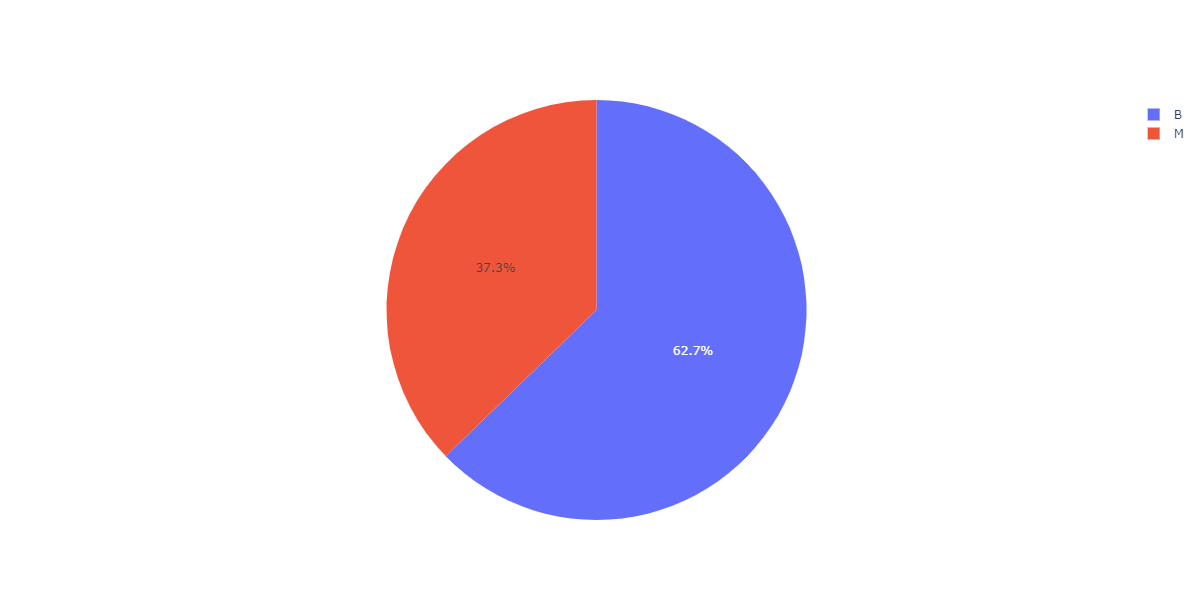

In [149]:
import plotly.graph_objects as go

labels = ["B","M"]
values = data.diagnosis.value_counts()
fig = go.Figure()
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    autosize=False,
    width=600,
    height=600)
fig.show()

In [150]:
data["diagnosis"] = [0 if i=="M" else 1 for i in data["diagnosis"]]

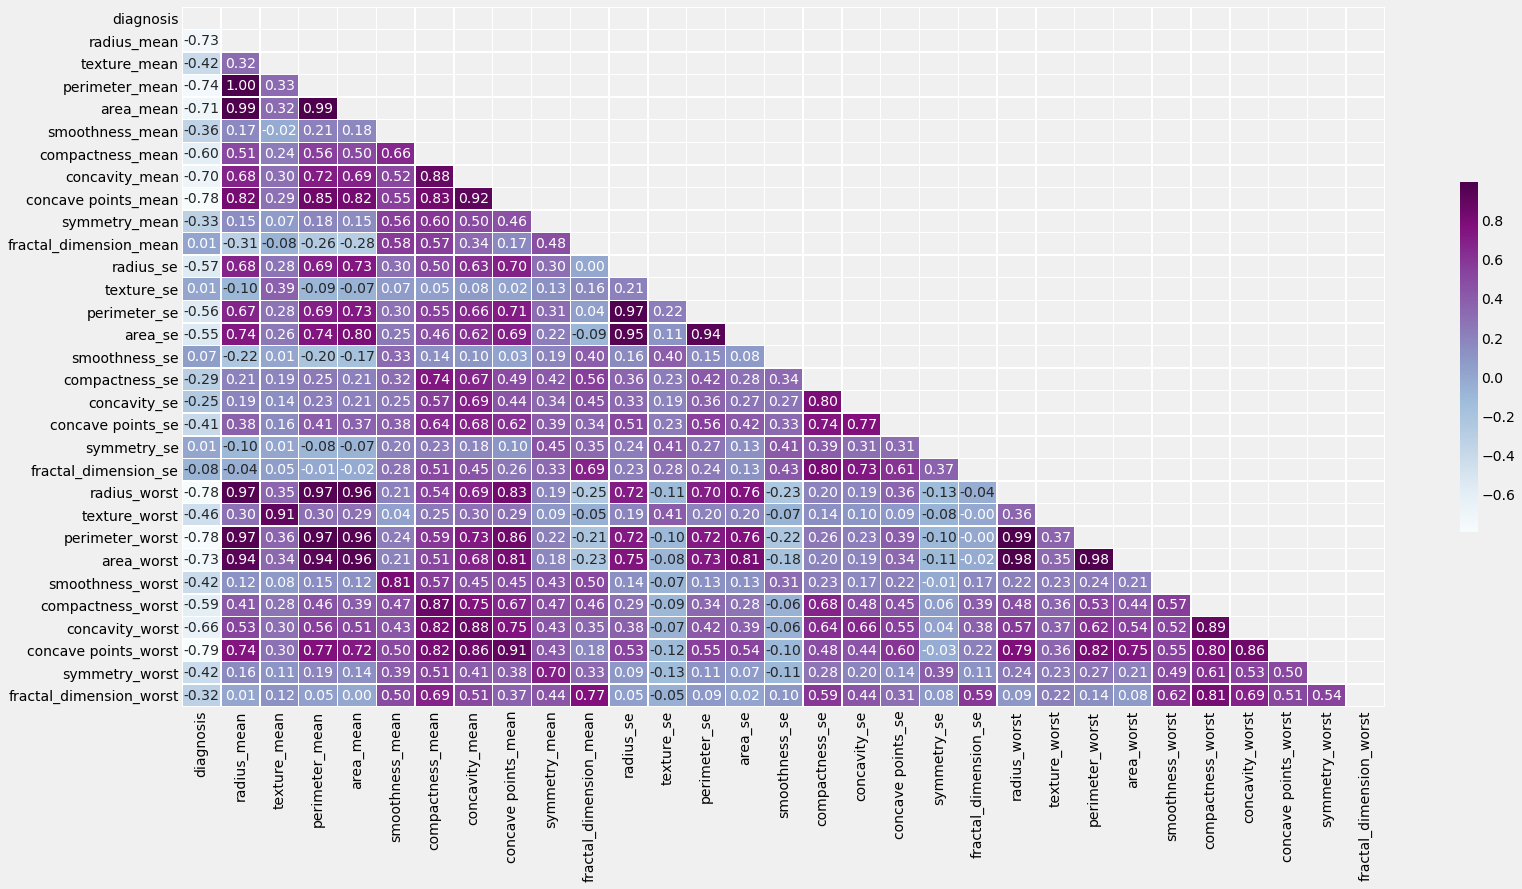

In [151]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="BuPu",mask=mask,linewidths=0.5,cbar_kws={"shrink": .5})

In [325]:
# We will leave the variables that have the least relationship with the target variable.
columns = ["symmetry_se","texture_se","fractal_dimension_mean","fractal_dimension_se","smoothness_se"]
data = data.drop(columns,1)

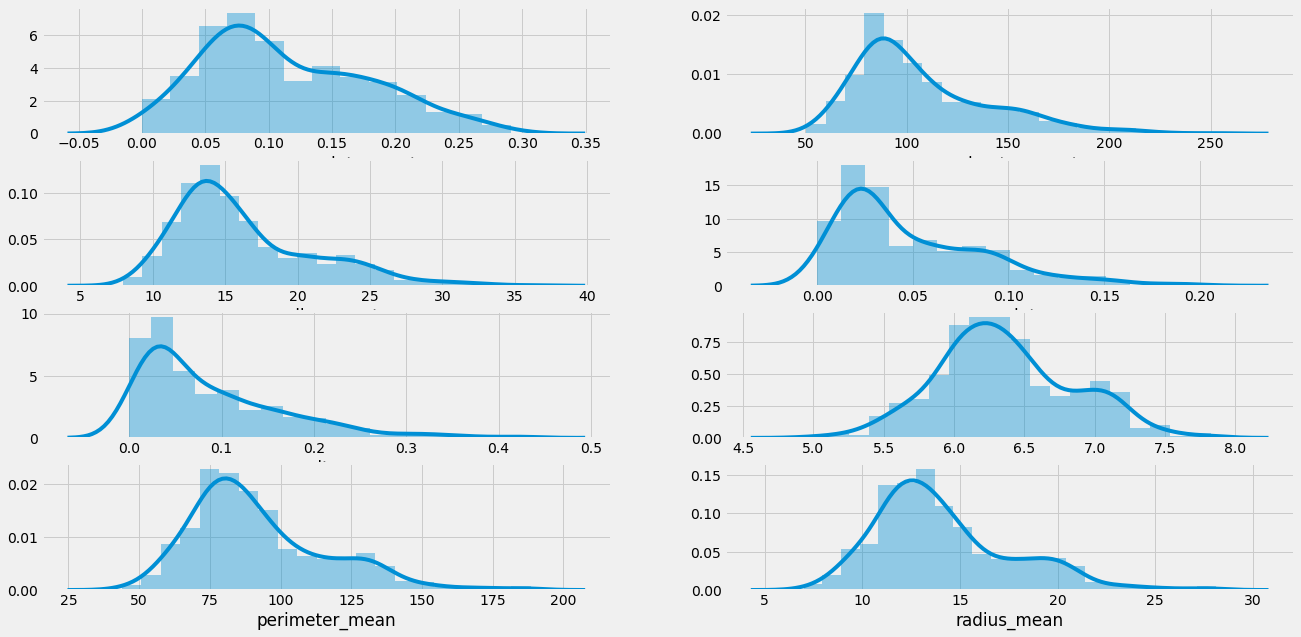

In [326]:
fig, ax = plt.subplots(4, 2, figsize=(20,10))
plt.style.use('fivethirtyeight')
sns.distplot(data["concave points_worst"], ax= ax[0,0])
sns.distplot(data["perimeter_worst"], ax= ax[0,1])
sns.distplot(data["radius_worst"], ax= ax[1,0])
sns.distplot(data["concave points_mean"], ax= ax[1,1])
sns.distplot(data["concavity_mean"], ax= ax[2,0])
sns.distplot(data["area_mean"], ax= ax[2,1])
sns.distplot(data["perimeter_mean"], ax= ax[3,0])
sns.distplot(data["radius_mean"], ax= ax[3,1])
plt.show()

In [ ]:
data["area_mean"]= np.log(data["area_mean"])

As seen in the chart:
- There is a very close correlation between "radius_mean" and "area_worst", "perimeter_worst", "radius_worst", "area_mean" and "perimeter_mean". Let's visualize the relationship between them.

Text(0.5, 0.98, 'The relationship between the target variable and high correlated variables')

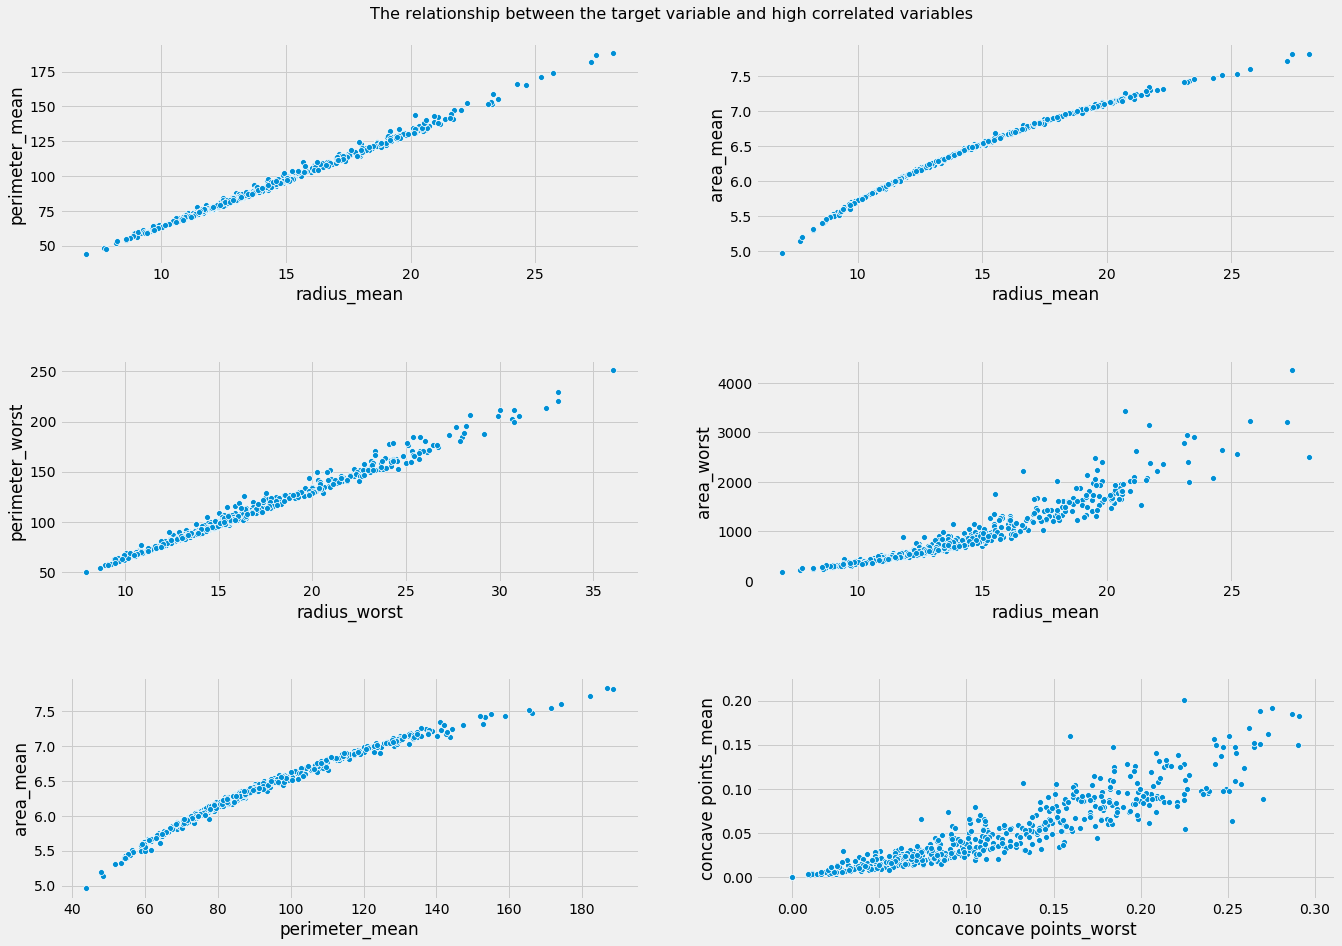

In [329]:
fig, ax = plt.subplots(3, 2, figsize=(20,14))
plt.style.use('fivethirtyeight')
sns.scatterplot("radius_mean", "perimeter_mean", data=data, ax=ax[0,0]) #The correlation between radius_mean and perimeter_mean is 1
sns.scatterplot("radius_mean", "area_mean", data=data, ax=ax[0,1])
sns.scatterplot("radius_worst", "perimeter_worst", data=data, ax=ax[1,0])
sns.scatterplot("radius_mean", "area_worst", data=data, ax=ax[1,1])
sns.scatterplot("perimeter_mean", "area_mean", data=data, ax=ax[2,0])
sns.scatterplot("concave points_worst", "concave points_mean", data=data, ax=ax[2,1])
fig.tight_layout(pad=4.0)
fig.suptitle("The relationship between the target variable and high correlated variables", fontsize=16)

## <b><span style="color:green">Check Outliers</span></b>

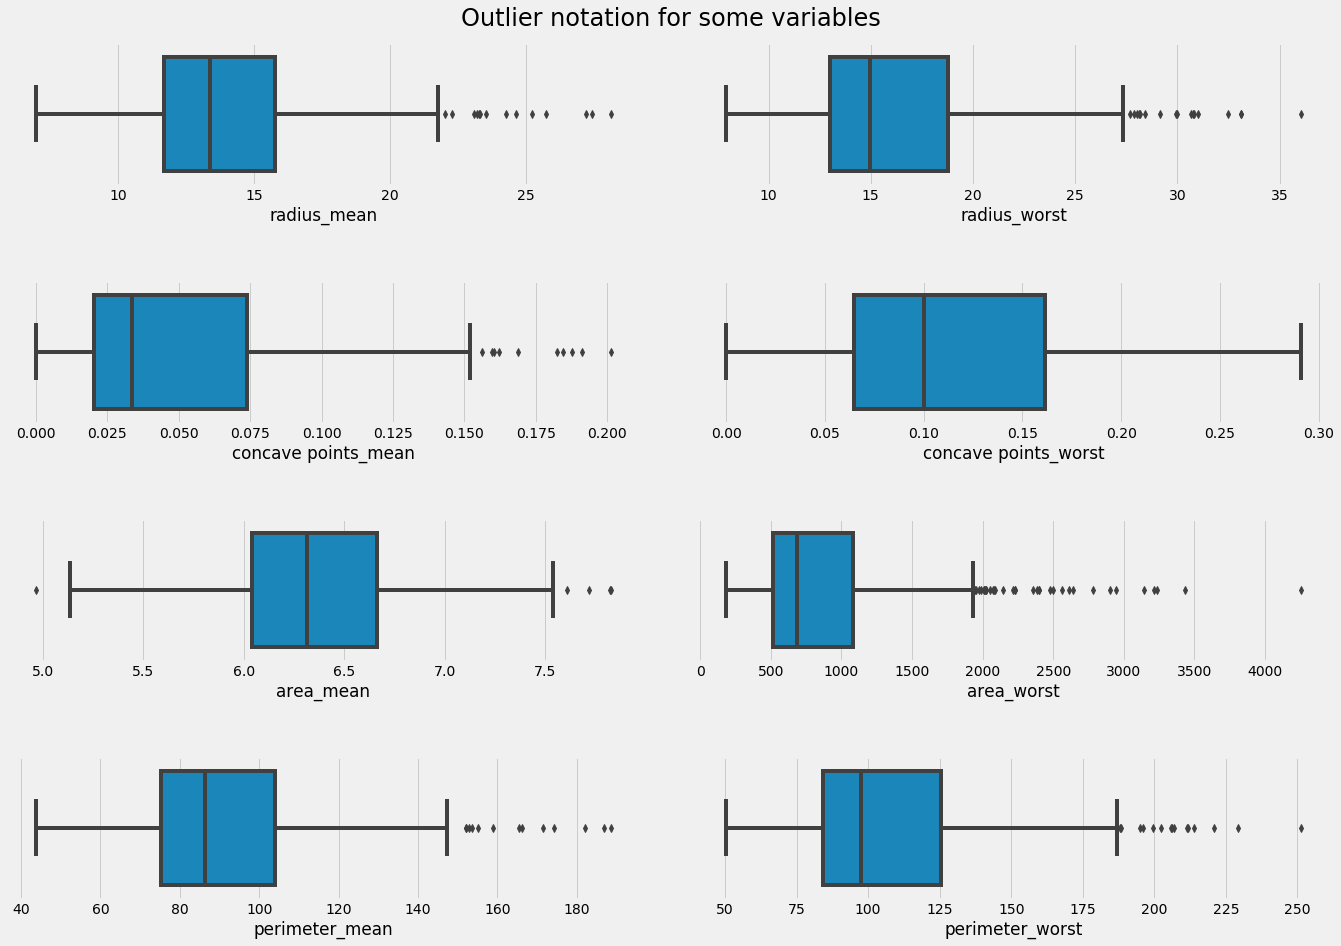

In [331]:
fig, ax = plt.subplots(4, 2, figsize=(20,14))
plt.style.use('fivethirtyeight')
fig.suptitle("Outlier notation for some variables", fontsize=24)
sns.boxplot("radius_mean",data=data, ax=ax[0,0])
sns.boxplot("radius_worst",data=data, ax=ax[0,1])
sns.boxplot("concave points_mean",data=data, ax=ax[1,0])
sns.boxplot("concave points_worst",data=data, ax=ax[1,1])
sns.boxplot("area_mean",data=data, ax=ax[2,0])
sns.boxplot("area_worst",data=data, ax=ax[2,1])
sns.boxplot("perimeter_mean",data=data, ax=ax[3,0])
sns.boxplot("perimeter_worst",data=data, ax=ax[3,1])
fig.tight_layout(pad=4.0)

### <b><span style="color:green">Outlier Detection and Remove with Isolation Forest</span>

In [450]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [456]:
X = data.iloc[:,1:]
y= data.diagnosis

isofor = IsolationForest (n_estimators = 500, contamination = 0.12)
isofor = isofor.fit(data)
isoF_outliers_values = data[isofor.predict(data) == -1]

In [457]:
len(isoF_outliers_values)

62

In [458]:
X = X.drop(isoF_outliers_values.index.values.tolist())
y = y.drop(isoF_outliers_values.index.values.tolist())


## <b><span style="color:green">Feature Selection using Random Forest Classifier</span>

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [460]:
rf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
rf.fit(X_train,y_train)
print(accuracy_score(y_test,rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

0.9555555555555556
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.95      0.99      0.97        91

    accuracy                           0.96       135
   macro avg       0.96      0.94      0.95       135
weighted avg       0.96      0.96      0.95       135



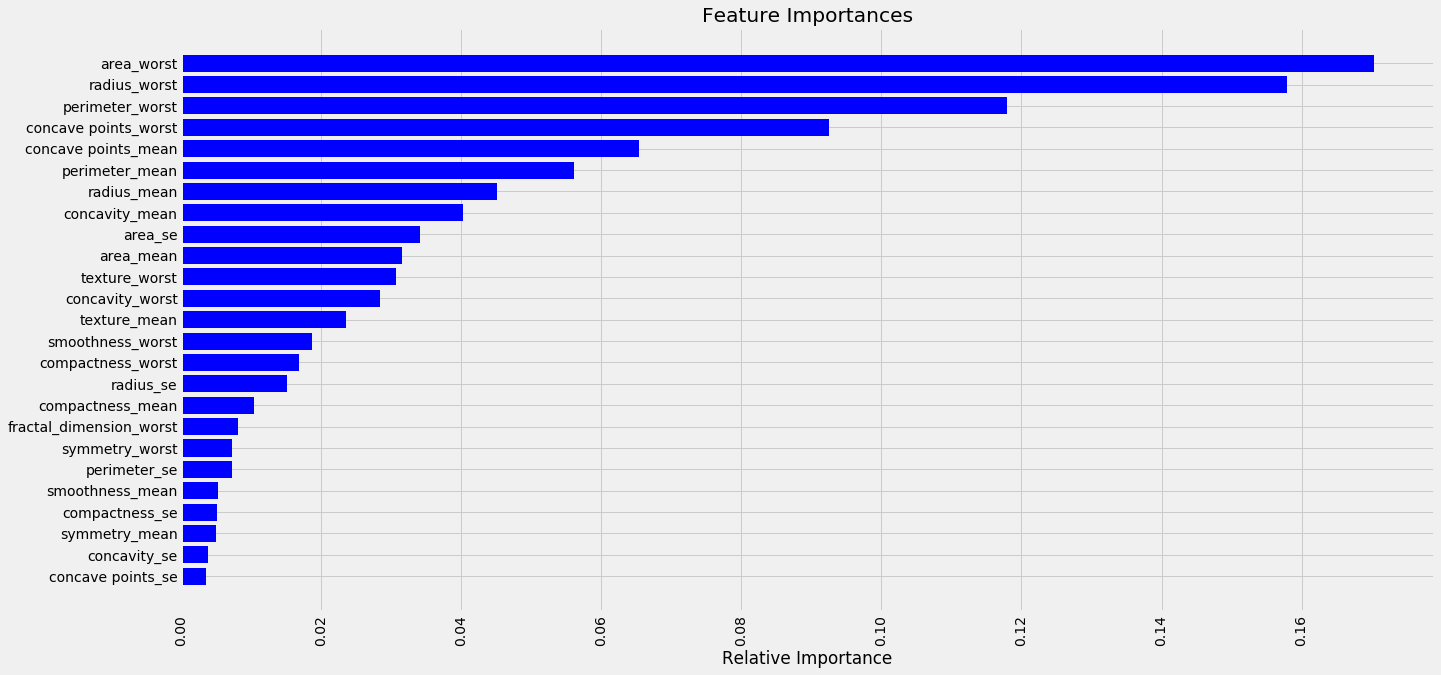

In [462]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[:]
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xticks(rotation=90)
plt.show()

#### <span style="color:red"> Taking the 4 variables with the highest value, let's create the model again</span>

In [472]:
columns = ["concave points_worst","area_worst","perimeter_worst","radius_worst"]
rf = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42)
rf.fit(X_train[columns],y_train)
print(accuracy_score(y_test,rf.predict(X_test[columns])))
print(classification_report(y_test,rf.predict(X_test[columns])))

0.9407407407407408
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        44
           1       0.93      0.99      0.96        91

    accuracy                           0.94       135
   macro avg       0.95      0.91      0.93       135
weighted avg       0.94      0.94      0.94       135



## <b><span style="color:green">Feature Selection using Principal component analysis (PCA) </span>

In [496]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [499]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.49279331 0.16193176]


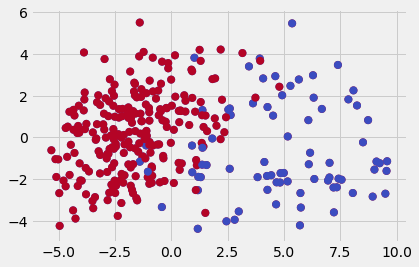

In [500]:
# PCA scatter plot
plt.scatter(X_train[:,0], X_train[:,1], c=(y_train == 0), cmap='coolwarm', label='M', linewidths=2)
plt.scatter(X_train[:,0], X_train[:,1], c=(y_train == 1), cmap='coolwarm', label='B', linewidths=2)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

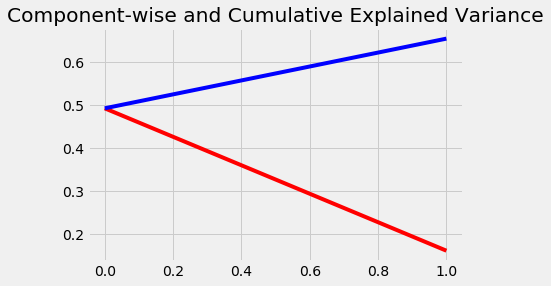

In [501]:
plt.plot(range(2), pca.explained_variance_ratio_, color="red")
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_),color="blue")
plt.title("Component-wise and Cumulative Explained Variance")

Accuracy 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.95      0.96      0.95        91

    accuracy                           0.93       135
   macro avg       0.93      0.92      0.92       135
weighted avg       0.93      0.93      0.93       135



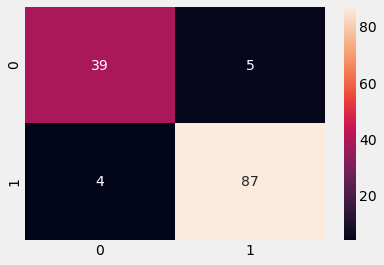

In [502]:
rf_pca = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy' , accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

## <b><span style="color:green">Optional: Visualization of the 3 most popular algorithms

In [503]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import time

#TSNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.7 s
PCA took 0.002 s
Truncated SVD took 0.005 s


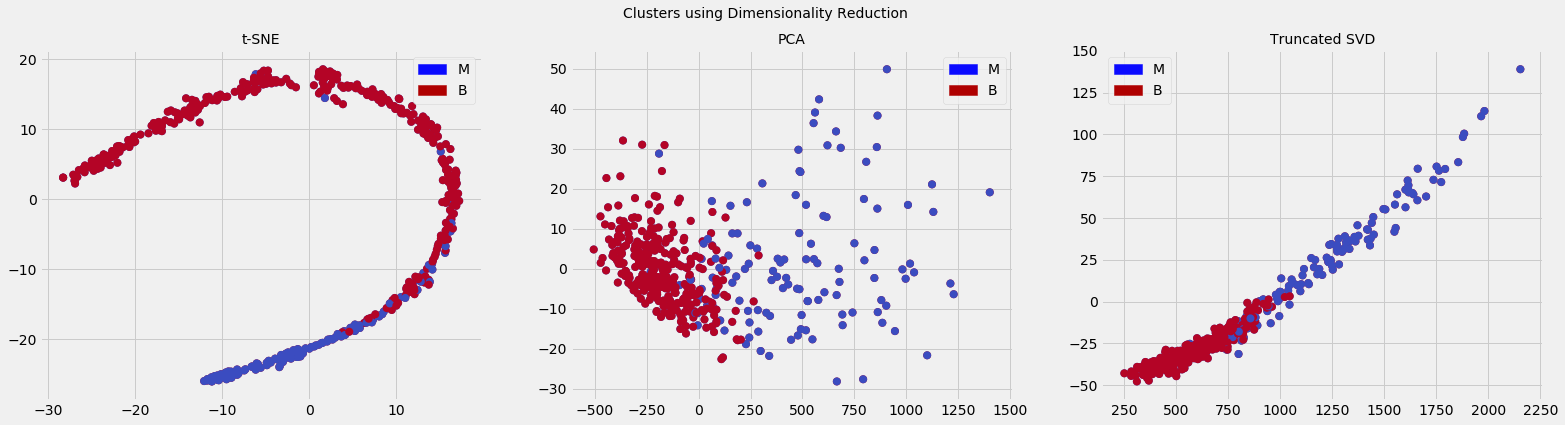

In [504]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='M')
red_patch = mpatches.Patch(color='#AF0000', label='B')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='M', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='B', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='M', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='B', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='M', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='B', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()